In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [2]:
data=pd.read_csv("C:\\Users\\fasy\\Downloads\\test.csv")

In [4]:
data.wifi.value_counts()

1    507
0    493
Name: wifi, dtype: int64

In [5]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
x=data[["px_height","ram","mobile_wt","fc","int_memory","px_width","battery_power"]].values
y=data["wifi"].values

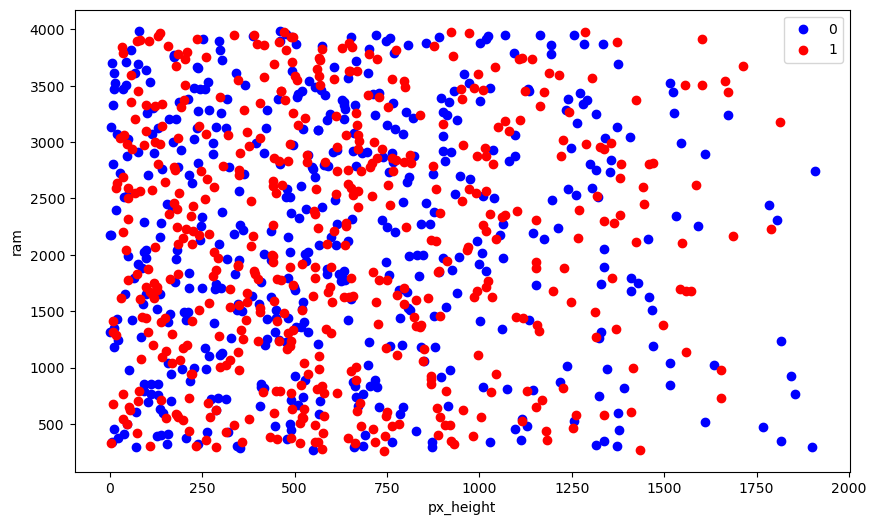

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='b',label='0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='r',label='1')
plt.xlabel("px_height")
plt.ylabel("ram")
plt.legend()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=42)

In [9]:
class LogisticRegression:
    def __init__(self,lrate=0.0001,iterations=1000):
        self.lrate=lrate
        self.iterations=iterations
        
    def scale(x):
        x_scaled=x-np.mean(x,axis=0)
        x_scaled=x_scaled/np.std(x_scaled,axis=0)
        return x_scaled
        
        
    def fit(self,x,y):
        self.losses=[]
        self.theta=np.zeros((1+x.shape[1]))
        n=x.shape[0]
        
        for i in range(self.iterations):
            y_pred=self.theta[0]+np.dot(x,self.theta[1:])
            z=y_pred
            g_z=1/(1+np.e**(-z))
            cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
            self.losses.append(cost)
            
            dtheta1=(1/n)*np.dot(x.T,(g_z-y))
            dtheta0=(1/n)*np.sum(g_z-y)
            
            self.theta[1:]=self.theta[1:]-self.lrate*dtheta1
            self.theta[0]=self.theta[0]-self.lrate*dtheta0
        return self
    
    def predict(self,x):
        y_pred=self.theta[0]+np.dot(x,self.theta[1:])
        z=y_pred
        g_z=1/(1+np.e**(-z))
        return [1 if i>0.4 else 0 for i in g_z]

In [10]:
def scale(x):
    x_scaled=x-np.mean(x,axis=0)
    x_scaled=x_scaled/np.std(x_scaled,axis=0)
    return x_scaled

In [11]:
x_sd=scale(x)
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: divide by zero encountered in log
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: invalid value encountered in multiply
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n


In [12]:
print("theta is : ",model.theta)

theta is :  [ 0.00078255  0.04023922  0.02281255  0.20921382 -0.00899309  0.08478721
 -0.11949163  0.1600148 ]


In [13]:
y_pred_train=model.predict(x_train)
y_pred_valid=model.predict(x_valid)

In [14]:
train_acc=metrics.accuracy_score(y_train,y_pred_train)
valid_acc=metrics.accuracy_score(y_valid,y_pred_valid)

In [15]:
print("traing accuracy is :",train_acc)
print("validation accuracy is :",valid_acc)

traing accuracy is : 0.5042857142857143
validation accuracy is : 0.5066666666666667


In [16]:
y_pred_test=model.predict(x_test)
test_acc=metrics.accuracy_score(y_test,y_pred_test)
print("traing accuracy is :",test_acc)

traing accuracy is : 0.54


In [17]:
print("#"*50)

##################################################


In [18]:
num_splits=5
kfold=StratifiedKFold(num_splits,shuffle=True,random_state=1)
train_accs,test_accs=[],[]
for train_index,test_index in kfold.split(x,y):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    train_accs.append(metrics.accuracy_score(y_train,y_pred_train)*100)
    test_accs.append(metrics.accuracy_score(y_test,y_pred_test)*100)

C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: divide by zero encountered in log
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: invalid value encountered in multiply
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: divide by zero encountered in log
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: invalid value encountered in multiply
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: divide by zero encountered in log
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\AppData\Local\Temp\ipykernel_9224\3429986115.py:21: RuntimeWarning: invalid value encountered in multiply
  cost=(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n
C:\Users\fasy\Ap

In [19]:
ave_train_acc=0
ave_test_acc=0
print("\t","training_acc","\t","testing_acc")

for i in range(num_splits):
    print(i,"\t",train_accs[i],"\t",test_accs[i])
    
    ave_train_acc+=train_accs[i]/num_splits
    ave_test_acc+=test_accs[i]/num_splits
print("AV","\t",ave_train_acc,"\t",ave_test_acc)

	 training_acc 	 testing_acc
0 	 49.5 	 51.0
1 	 50.74999999999999 	 50.5
2 	 49.625 	 49.0
3 	 49.125 	 50.5
4 	 50.125 	 52.0
AV 	 49.824999999999996 	 50.599999999999994
